<a href="https://colab.research.google.com/github/FrkAk/Deep_Learning_Workshop/blob/master/Workshop/Default_Payment_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

# Define Methods

In [233]:
def read_dataset():
  data = pd.read_csv("dataset.csv",
                  skiprows=1,
                  names=["LIMIT_BAL",	"SEX", "EDUCATION",	"MARRIAGE",	"AGE",
                          "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4"	,"PAY_5",	"PAY_6",
                          "BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",
                          "PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",
                          "default.payment.next.month"])
  data.head()
  return data
  
def get_dimension(names):
  return len(names)


## Split the Dataset

In [249]:
def split(data,test_size):
  from sklearn.model_selection import train_test_split
  train, test = train_test_split(data, test_size=test_size)
  # self.train.head()
  return train,test

### Extract Labels

In [250]:
def extract_features(data,data_names,label_name='default.payment.next.month'):
  features = data[data_names[:-1]].values
  labels = data[label_name].values
  return features,labels

### Convert to NumPy array

In [251]:
def convert_features_frame_to_numpy(frame):
    features = np.array(frame)
    return features

## Model Structure

In [307]:
def create_model(dim):
  model = tf.keras.Sequential([
    layers.Conv1D(filters=128, kernel_size=3,
                  strides=1,
                  activation="relu",
                  padding='causal',
                  input_shape=[dim, 1]),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    # layers.Dense(32,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Flatten(),
    layers.Dense(1,activation='sigmoid')
  ])
  model.summary()
  return model

In [285]:
def get_model_weights(model):
  return model.get_weights()

## Tune the Learning Rate

It is needed to pick an optimal learning rate.

In [312]:
def tune_learning_rate(model,features,labels):
  # Set the learning rate scheduler
  lr_schedule = tf.keras.callbacks.LearningRateScheduler(
      lambda epoch: 1e-8 * 10**(epoch / 20))

  # Initialize the optimizer
  optimizer = tf.keras.optimizers.Adam()

  # Set the training parameters
  model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                    optimizer = optimizer,metrics=['accuracy'])

  # Train the model
  history = model.fit(features,labels, epochs=100, callbacks=[lr_schedule])
  return history

In [313]:
def plot_learning_rate(history):
  # Define the learning rate array
  lrs = 1e-8 * (10 ** (np.arange(100) / 20))

  # Set the figure size
  plt.figure(figsize=(10, 6))

  # Set the grid
  plt.grid(True)

  # Plot the loss in log scale
  plt.semilogx(lrs, history.history["loss"])

  # Increase the tickmarks size
  plt.tick_params('both', length=10, width=1, which='both')

  # Set the plot boundaries
  plt.axis([1e-8, 1e-3, 0, 10])

## Train the model

In [320]:
def model_compile(model,init_weights,learning_rate=4e-4):
  # Reset states generated by Keras
  tf.keras.backend.clear_session()

  # Reset the weights
  model.set_weights(init_weights)

  model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate),
                metrics=['accuracy'])
  return model

In [323]:
def train_model(model,features,labels):
  history = model.fit(features, labels, 
                      validation_split=0.2,
                      shuffle = True,
                      epochs=20,)
  return history


In [302]:
def test_model(model,features, labels):
  result = model.evaluate(features, labels)
  return result

In [303]:
def plot_history(history):
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

# MAIN

In [304]:
names_all=["LIMIT_BAL",	"SEX", "EDUCATION",	"MARRIAGE",	"AGE",
           "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4"	,"PAY_5",	"PAY_6",
           "BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",
           "PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",
           "default.payment.next.month"]

names_non_demographic=["LIMIT_BAL","AGE",
           "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4"	,"PAY_5",	"PAY_6",
           "BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",
           "PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",
           "default.payment.next.month"]

names_non_SEX=["LIMIT_BAL", "EDUCATION",	"MARRIAGE",	"AGE",
           "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4"	,"PAY_5",	"PAY_6",
           "BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",
           "PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",
           "default.payment.next.month"]

names_non_EDU=["LIMIT_BAL",	"SEX",	"MARRIAGE",	"AGE",
           "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4"	,"PAY_5",	"PAY_6",
           "BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",
           "PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",
           "default.payment.next.month"]

names_non_MAR=["LIMIT_BAL",	"SEX", "EDUCATION",	"AGE",
           "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4"	,"PAY_5",	"PAY_6",
           "BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",
           "PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",
           "default.payment.next.month"]

names_non_PAY=["LIMIT_BAL",	"SEX", "EDUCATION",	"MARRIAGE",	"AGE",
           
           "BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",
           "PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",
           "default.payment.next.month"]

names_non_BILL=["LIMIT_BAL",	"SEX", "EDUCATION",	"MARRIAGE",	"AGE",
           "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4"	,"PAY_5",	"PAY_6",
           
           "PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",
           "default.payment.next.month"]

names_non_PAY_AMNT=["LIMIT_BAL",	"SEX", "EDUCATION",	"MARRIAGE",	"AGE",
           "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4"	,"PAY_5",	"PAY_6",
           "BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",
           
           "default.payment.next.month"]

names_non_PAY_ALL=["LIMIT_BAL",	"SEX", "EDUCATION",	"MARRIAGE",	"AGE",
           
           "BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",
           
           "default.payment.next.month"]

names_non_BILL_PAY_AMNT=["LIMIT_BAL",	"SEX", "EDUCATION",	"MARRIAGE","AGE",
           "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4"	,"PAY_5",	"PAY_6",
           
           "default.payment.next.month"]

names_non_PAY_BILL=["LIMIT_BAL",	"SEX", "EDUCATION",	"MARRIAGE","AGE",
           
           "PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",
           "default.payment.next.month"]

names_non_PAY_BILL_PAY_AMNT=["LIMIT_BAL",	"SEX", "EDUCATION",	"MARRIAGE", "AGE",
           
           "default.payment.next.month"]

names_only_DEMOGRAPH=["SEX", "EDUCATION","MARRIAGE",	"AGE",
           
           "default.payment.next.month"]


## Dataset Split Structure

*   Train and Validation 80%
  *   Train 80%
  *   Validation 20%

*   Test 20%


So if we have 100 indivual data;
*   64 of them Training
*   16 of them Validation
*   20 of them Test





## Network Run

In [326]:
def build_network(data_names,tune=False):
  data = read_dataset()
  dim = get_dimension(data_names) - 1
  train, test = split(data,test_size=0.2)

  train_features, train_labels = extract_features(train,data_names,label_name='default.payment.next.month')
  test_features, test_labels = extract_features(test,data_names,label_name='default.payment.next.month')
  
  train_features = convert_features_frame_to_numpy(train_features)
  test_features = convert_features_frame_to_numpy(test_features)

  train_labels = convert_features_frame_to_numpy(train_labels)
  #train_labels = np.expand_dims(train_labels, axis=0)

  test_labels = convert_features_frame_to_numpy(test_labels)
  #test_labels = np.expand_dims(test_labels, axis=0)

  print("Feature Shape: {}".format(train_features.shape))
  print("Labels Shape: {}".format(train_labels.shape))

  model = create_model(dim)
  init_weights = get_model_weights(model)

  if tune:
    tune_history = tune_learning_rate(model,train_features,train_labels)
    plot_learning_rate(tune_history)
    return tune_history, [0,0], model
  
  else:
    model = model_compile(model,init_weights,learning_rate=8e-5)
    
    history = train_model(model,train_features,train_labels)

    plot_history(history)

    result = test_model(model,test_features, test_labels)

    return history, result, model



## Training

Feature Shape: (24000, 23)
Labels Shape: (24000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 23, 128)           512       
                                                                 
 dense (Dense)               (None, 23, 128)           16512     
                                                                 
 dense_1 (Dense)             (None, 23, 64)            8256      
                                                                 
 dense_2 (Dense)             (None, 23, 16)            1040      
                                                                 
 flatten (Flatten)           (None, 368)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 369       
                                                                 
Total 

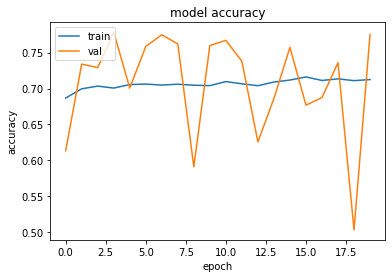

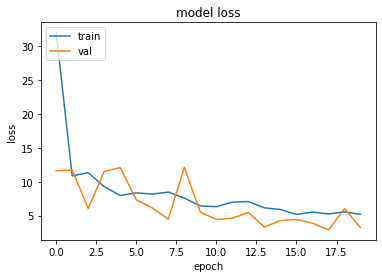

188/188 [==============================] - 2s 12ms/step - loss: 3.6908 - accuracy: 0.7738


In [327]:
all_features_history, all_features_result, all_features_model = build_network(names_all,tune=False)

Feature Shape: (24000, 20)
Labels Shape: (24000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 128)           512       
                                                                 
 dense (Dense)               (None, 20, 128)           16512     
                                                                 
 dense_1 (Dense)             (None, 20, 64)            8256      
                                                                 
 dense_2 (Dense)             (None, 20, 16)            1040      
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 321       
                                                                 
Total 

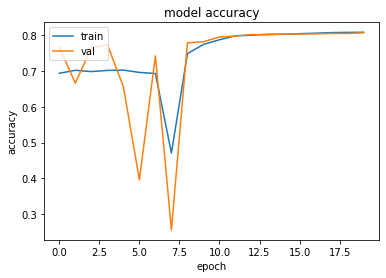

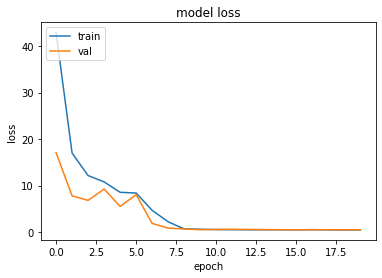

188/188 [==============================] - 4s 18ms/step - loss: 0.5105 - accuracy: 0.8088


In [328]:
non_demographic_features_history, non_demographic_features_result, non_demographic_features_model = build_network(names_non_demographic,tune=False)

Feature Shape: (24000, 22)
Labels Shape: (24000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 22, 128)           512       
                                                                 
 dense (Dense)               (None, 22, 128)           16512     
                                                                 
 dense_1 (Dense)             (None, 22, 64)            8256      
                                                                 
 dense_2 (Dense)             (None, 22, 16)            1040      
                                                                 
 flatten (Flatten)           (None, 352)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 353       
                                                                 
Total 

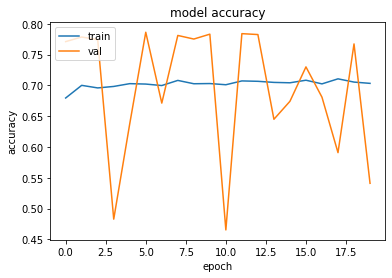

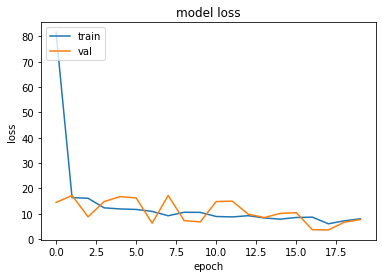

188/188 [==============================] - 2s 11ms/step - loss: 8.4484 - accuracy: 0.5337


In [329]:
non_SEX_features_history, non_SEX_features_result, non_SEX_features_model = build_network(names_non_SEX,tune=False)

Feature Shape: (24000, 22)
Labels Shape: (24000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 22, 128)           512       
                                                                 
 dense (Dense)               (None, 22, 128)           16512     
                                                                 
 dense_1 (Dense)             (None, 22, 64)            8256      
                                                                 
 dense_2 (Dense)             (None, 22, 16)            1040      
                                                                 
 flatten (Flatten)           (None, 352)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 353       
                                                                 
Total 

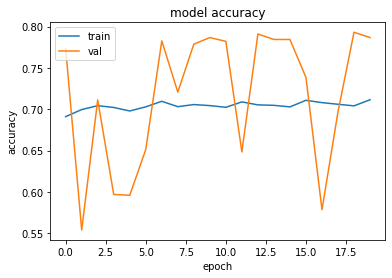

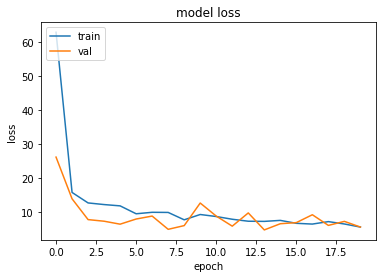

188/188 [==============================] - 2s 12ms/step - loss: 6.0180 - accuracy: 0.7793


In [330]:
non_EDU_features_history, non_EDU_features_result, non_EDU_features_model = build_network(names_non_EDU,tune=False)

Feature Shape: (24000, 22)
Labels Shape: (24000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 22, 128)           512       
                                                                 
 dense (Dense)               (None, 22, 128)           16512     
                                                                 
 dense_1 (Dense)             (None, 22, 64)            8256      
                                                                 
 dense_2 (Dense)             (None, 22, 16)            1040      
                                                                 
 flatten (Flatten)           (None, 352)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 353       
                                                                 
Total 

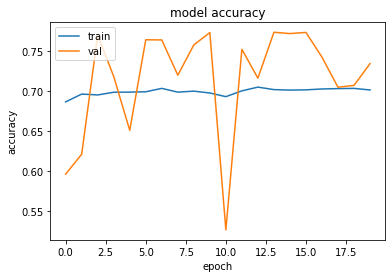

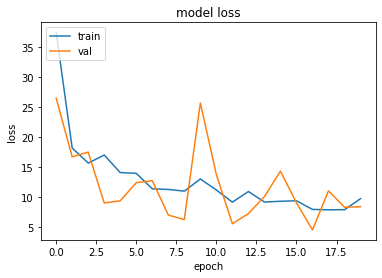

188/188 [==============================] - 4s 21ms/step - loss: 7.6991 - accuracy: 0.7452


In [331]:
non_MAR_features_history, non_MAR_features_result,non_MAR_features_model = build_network(names_non_MAR,tune=False)

Feature Shape: (24000, 17)
Labels Shape: (24000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 17, 128)           512       
                                                                 
 dense (Dense)               (None, 17, 128)           16512     
                                                                 
 dense_1 (Dense)             (None, 17, 64)            8256      
                                                                 
 dense_2 (Dense)             (None, 17, 16)            1040      
                                                                 
 flatten (Flatten)           (None, 272)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 273       
                                                                 
Total 

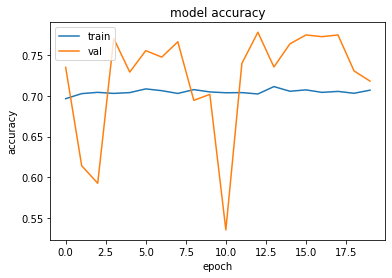

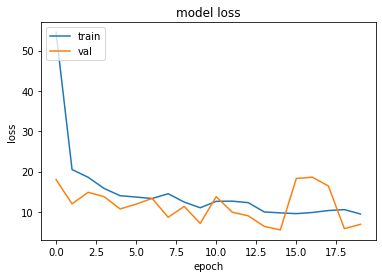

188/188 [==============================] - 2s 11ms/step - loss: 7.8899 - accuracy: 0.7278


In [332]:
non_PAY_features_history, non_PAY_features_result, non_PAY_features_model = build_network(names_non_PAY,tune=False)

Feature Shape: (24000, 17)
Labels Shape: (24000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 17, 128)           512       
                                                                 
 dense (Dense)               (None, 17, 128)           16512     
                                                                 
 dense_1 (Dense)             (None, 17, 64)            8256      
                                                                 
 dense_2 (Dense)             (None, 17, 16)            1040      
                                                                 
 flatten (Flatten)           (None, 272)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 273       
                                                                 
Total 

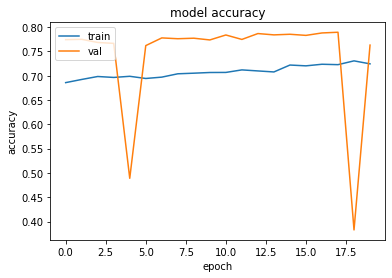

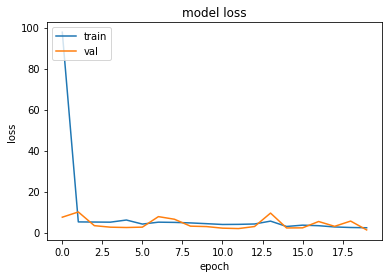

188/188 [==============================] - 3s 15ms/step - loss: 1.2973 - accuracy: 0.7570


In [333]:
non_BILL_features_history, non_BILL_features_result,non_BILL_features_model = build_network(names_non_BILL,tune=False)

Feature Shape: (24000, 17)
Labels Shape: (24000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 17, 128)           512       
                                                                 
 dense (Dense)               (None, 17, 128)           16512     
                                                                 
 dense_1 (Dense)             (None, 17, 64)            8256      
                                                                 
 dense_2 (Dense)             (None, 17, 16)            1040      
                                                                 
 flatten (Flatten)           (None, 272)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 273       
                                                                 
Total 

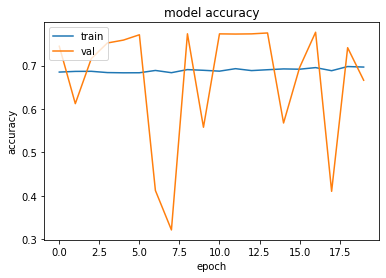

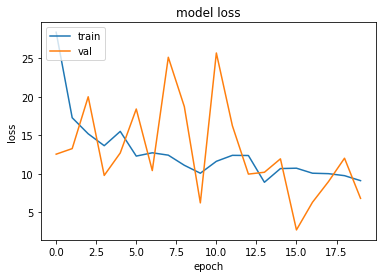

188/188 [==============================] - 2s 11ms/step - loss: 6.6081 - accuracy: 0.6745


In [334]:
non_PAY_AMNT_features_history, non_PAY_AMNT_features_result, non_PAY_AMNT_features_model = build_network(names_non_PAY_AMNT,tune=False)

Feature Shape: (24000, 11)
Labels Shape: (24000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 11, 128)           512       
                                                                 
 dense (Dense)               (None, 11, 128)           16512     
                                                                 
 dense_1 (Dense)             (None, 11, 64)            8256      
                                                                 
 dense_2 (Dense)             (None, 11, 16)            1040      
                                                                 
 flatten (Flatten)           (None, 176)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 177       
                                                                 
Total 

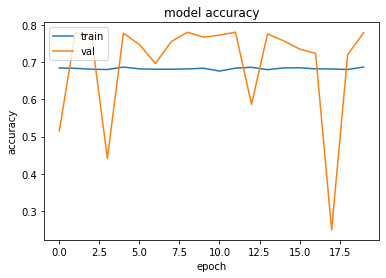

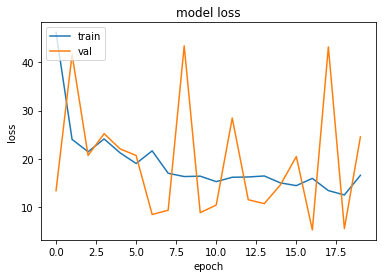

188/188 [==============================] - 2s 11ms/step - loss: 22.5270 - accuracy: 0.7872


In [335]:
non_PAY_ALL_features_history, non_PAY_ALL_features_result,non_PAY_ALL_features_model = build_network(names_non_PAY_ALL,tune=False)

Feature Shape: (24000, 11)
Labels Shape: (24000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 11, 128)           512       
                                                                 
 dense (Dense)               (None, 11, 128)           16512     
                                                                 
 dense_1 (Dense)             (None, 11, 64)            8256      
                                                                 
 dense_2 (Dense)             (None, 11, 16)            1040      
                                                                 
 flatten (Flatten)           (None, 176)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 177       
                                                                 
Total 

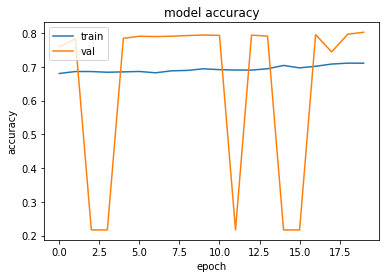

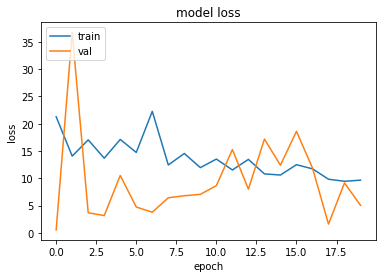

188/188 [==============================] - 4s 21ms/step - loss: 5.2492 - accuracy: 0.7838


In [336]:
non_BILL_PAY_AMNT_features_history, non_BILL_PAY_AMNT_features_result,non_BILL_PAY_AMNT_features_model = build_network(names_non_BILL_PAY_AMNT,tune=False)

Feature Shape: (24000, 11)
Labels Shape: (24000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 11, 128)           512       
                                                                 
 dense (Dense)               (None, 11, 128)           16512     
                                                                 
 dense_1 (Dense)             (None, 11, 64)            8256      
                                                                 
 dense_2 (Dense)             (None, 11, 16)            1040      
                                                                 
 flatten (Flatten)           (None, 176)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 177       
                                                                 
Total 

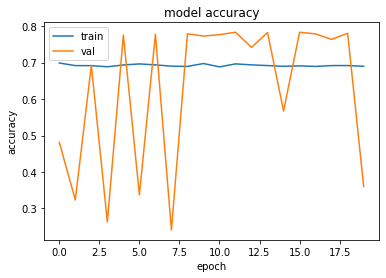

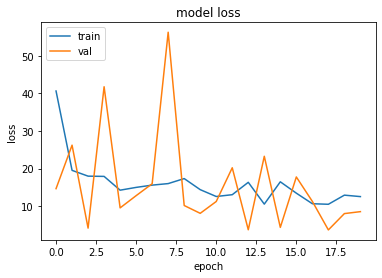

188/188 [==============================] - 2s 10ms/step - loss: 8.6125 - accuracy: 0.3723


In [337]:
non_PAY_BILL_features_history, non_PAY_BILL_features_result,non_PAY_BILL_features_model = build_network(names_non_PAY_BILL,tune=False)

Feature Shape: (24000, 5)
Labels Shape: (24000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 128)            512       
                                                                 
 dense (Dense)               (None, 5, 128)            16512     
                                                                 
 dense_1 (Dense)             (None, 5, 64)             8256      
                                                                 
 dense_2 (Dense)             (None, 5, 16)             1040      
                                                                 
 flatten (Flatten)           (None, 80)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 81        
                                                                 
Total p

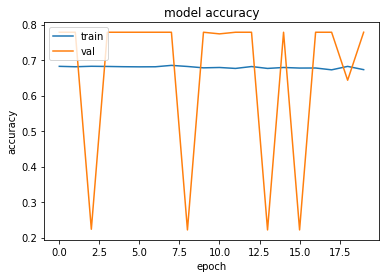

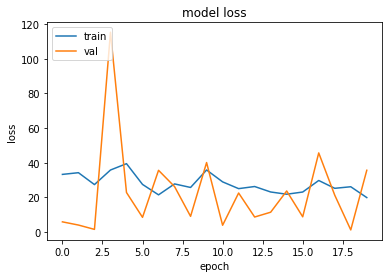

188/188 [==============================] - 1s 3ms/step - loss: 33.8501 - accuracy: 0.7825


In [338]:
non_PAY_BILL_PAY_AMNT_features_history, non_PAY_BILL_PAY_AMNT_features_result, non_PAY_BILL_PAY_AMNT_features_model = build_network(names_non_PAY_BILL_PAY_AMNT,tune=False)

Feature Shape: (24000, 4)
Labels Shape: (24000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 128)            512       
                                                                 
 dense (Dense)               (None, 4, 128)            16512     
                                                                 
 dense_1 (Dense)             (None, 4, 64)             8256      
                                                                 
 dense_2 (Dense)             (None, 4, 16)             1040      
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total p

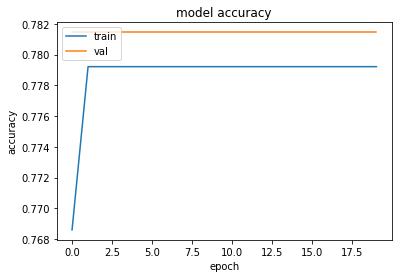

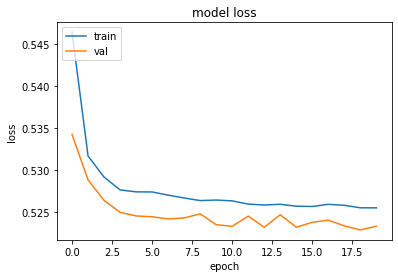

188/188 [==============================] - 2s 10ms/step - loss: 0.5304 - accuracy: 0.7753


In [339]:
only_DEMOGRAPH_features_history, only_DEMOGRAPH_features_result,only_DEMOGRAPH_features_model = build_network(names_only_DEMOGRAPH,tune=False)

# Result

In [345]:
from tabulate import tabulate
print(tabulate([['all_features', {}, {}],
                ['non_demographic_features', {}, {}], 
                ['non_SEX_features', {}, {}],
                ['non_EDU_features', {}, {}],
                ['non_MAR_features', {}, {}],
                ['non_PAY_features', {}, {}],
                ['non_BILL_features', {}, {}],
                ['non_PAY_AMNT_features', {}, {}],
                ['non_PAY_ALL_features', {}, {}],
                ['non_BILL_PAY_AMNT_features', {}, {}],
                ['non_PAY_BILL_features', {}, {}],
                ['non_PAY_BILL_PAY_AMNT_features', {}, {}],
                ['only_DEMOGRAPH_features', {}, {}]], 
               headers=['Dataset Configuration','Loss','Accuracy'],floatfmt='.2f').format(
                   all_features_result[0],all_features_result[1]*100,
                   non_demographic_features_result[0],non_demographic_features_result[1]*100,
                   non_SEX_features_result[0],non_SEX_features_result[1]*100,
                   non_EDU_features_result[0],non_EDU_features_result[1]*100,
                   non_MAR_features_result[0],non_MAR_features_result[1]*100,
                   non_PAY_features_result[0],non_PAY_features_result[1]*100,
                   non_BILL_features_result[0],non_BILL_features_result[1]*100,
                   non_PAY_AMNT_features_result[0],non_PAY_AMNT_features_result[1]*100,
                   non_PAY_ALL_features_result[0],non_PAY_ALL_features_result[1]*100,
                   non_BILL_PAY_AMNT_features_result[0],non_BILL_PAY_AMNT_features_result[1]*100,
                   non_PAY_BILL_features_result[0],non_PAY_BILL_features_result[1]*100,
                   non_PAY_BILL_PAY_AMNT_features_result[0],non_PAY_BILL_PAY_AMNT_features_result[1]*100,
                   only_DEMOGRAPH_features_result[0],only_DEMOGRAPH_features_result[1]*100))

Dataset Configuration           Loss    Accuracy
------------------------------  ------  ----------
all_features                    3.6907958984375      77.38333344459534
non_demographic_features        0.5105132460594177      80.8833360671997
non_SEX_features                8.448404312133789      53.36666703224182
non_EDU_features                6.018040180206299      77.93333530426025
non_MAR_features                7.699134826660156      74.51666593551636
non_PAY_features                7.889886856079102      72.78333306312561
non_BILL_features               1.2973213195800781      75.70000290870667
non_PAY_AMNT_features           6.608059406280518      67.44999885559082
non_PAY_ALL_features            22.527009963989258      78.71666550636292
non_BILL_PAY_AMNT_features      5.2492170333862305      78.38333249092102
non_PAY_BILL_features           8.612476348876953      37.23333477973938
non_PAY_BILL_PAY_AMNT_features  33.85006332397461      78.25000286102295
only_DEMOGRAPH_features

In this deep learning task, there are 13 different data configurations are tested to see the effect of features. The aim was to investigate demographic features' effect on the prediction of default payment for the next month and find the strongest features. The result shows us although some accuracy changes are occurring on a different dataset, there is some sign of the effect of demographic features changing the prediction. The difference increases when we do not count on SEX. This can raise some questions and needs to investigate further to answer accurately. Example research could be training the same network on different gender to see the exact effect. However, this needs lots of time, and this may be beyond this task since time is limited. Also, It is clearly seen that PAY and BILL_AMT affect the network by increasing the loss and decreasing the accuracy. Apart from that, it can be said that the model acts almost fairly toward different people when we change the structure of the dataset.